In [ ]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:41<00:00, 23.7MB/s]
100% 2.70G/2.70G [00:41<00:00, 69.4MB/s]


In [ ]:
# unzip
!mkdir plant
!unzip -qq new-plant-diseases-dataset.zip -d plant
!ls plant

'new plant diseases dataset(augmented)'   test
'New Plant Diseases Dataset(Augmented)'


In [ ]:
!ls 'plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
import os

plant = os.path.join('/content/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)')
train_dir = plant + "/train"
plant_diseases= os.listdir(train_dir)

In [ ]:
print("Total class tanaman: {}".format(len(plant_diseases)))

Total class tanaman: 38


In [ ]:
#mengekstrak jumlah unique plants & unique diseases
plants = []
Number_Diseases = 0
for plant in plant_diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        Number_Diseases += 1

In [ ]:
# daftar unique plants di dataset
print(f"Daftar plant: \n{plants}")

Daftar plant: 
['Tomato', 'Corn_(maize)', 'Raspberry', 'Potato', 'Grape', 'Apple', 'Squash', 'Cherry_(including_sour)', 'Peach', 'Soybean', 'Orange', 'Strawberry', 'Pepper,_bell', 'Blueberry']


In [ ]:
# jumlah unique plants
print("jumlah unique plant: {}".format(len(plants)))

jumlah unique plant: 14


In [ ]:
# jumlah unique diseases
print("jumlah diseases: {}".format(Number_Diseases))

jumlah diseases: 26


Jadi kita memiliki gambar daun(*leaves*) dari 14 jenis tanaman(*plants*) dan 26 jenis gambar berdasarkan penyakit(*diseases*) tertentu pada tanaman tertentu.

In [ ]:
import pandas as pd
# Jumlah gambar
nums = {}
for disease in plant_diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# mengkonversi nums dictionary ke dataframe, nama tanaman sebagai indeks dan jumlah images sebagai kolom
num_img = pd.DataFrame(nums.values(), index=nums.keys(), columns=["Num_images"])
num_img

,Num_images
Tomato___healthy,1926
Corn_(maize)___Common_rust_,1907
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1961
Raspberry___healthy,1781
Potato___healthy,1824
Potato___Early_blight,1939
Grape___Esca_(Black_Measles),1920
Tomato___Bacterial_spot,1702
Apple___Black_rot,1987
Apple___Apple_scab,2016


In [ ]:
num_train_img = 0
for value in nums.values():
    num_train_img += value
print(f"ada {num_train_img} images untuk di training")

ada 70295 images untuk di training


<function matplotlib.pyplot.show>

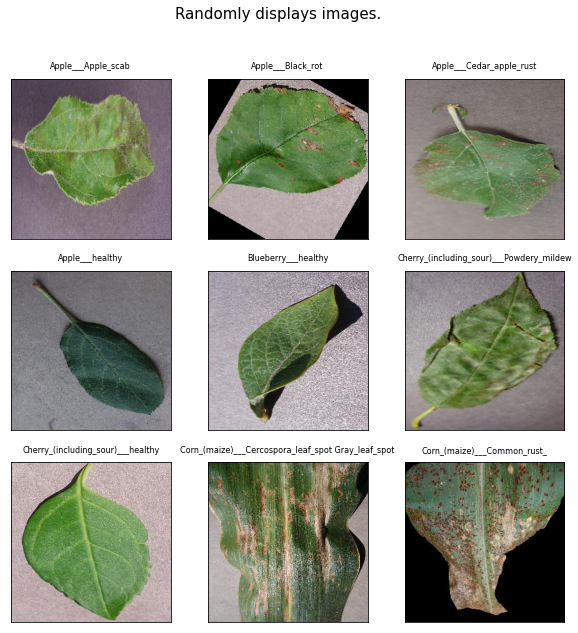

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(10,10))
fig.suptitle("Randomly displays images.", fontsize=15)
plant_sorted = sorted(plant_diseases)
plant_id = 0
for i in range(3):
  for j in range(3):
    try:
      plant_selected = plant_sorted[plant_id] 
      plant_id += 1
    except:
      break
    if plant_selected == '.TEMP':
        continue
    plant_selected_images = os.listdir(os.path.join(train_dir, plant_selected))
    plant_selected_random = np.random.choice(plant_selected_images)
    img = plt.imread(os.path.join(train_dir, plant_selected, plant_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(plant_selected, pad=10, fontsize=8)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [ ]:
r= (244, 244)
data_train = train_datagen.flow_from_directory(
    train_dir,
    target_size=r,
    batch_size=256,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    train_dir, 
    target_size=r,
    batch_size=256,
    class_mode='categorical',
    subset='validation')

Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.


In [ ]:
import tensorflow as tf

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(244,244,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 242, 242, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 121, 121, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 119, 119, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 57, 57, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 26, 128)      

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.94 and logs.get('val_accuracy')>0.94):
      print("\nAccuracy above 94%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(data_train, 
                    epochs = 50, 
                    steps_per_epoch = 20,
                    validation_data = data_val, 
                    validation_steps = 20,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/50
20/20 [==============================] - 145s 7s/step - loss: 3.6430 - accuracy: 0.0309 - val_loss: 3.4691 - val_accuracy: 0.0756
Epoch 2/50
20/20 [==============================] - 141s 7s/step - loss: 3.4485 - accuracy: 0.0771 - val_loss: 3.3426 - val_accuracy: 0.1158
Epoch 3/50
20/20 [==============================] - 142s 7s/step - loss: 3.2199 - accuracy: 0.1296 - val_loss: 2.9132 - val_accuracy: 0.1816
Epoch 4/50
20/20 [==============================] - 141s 7s/step - loss: 2.7914 - accuracy: 0.2120 - val_loss: 2.6699 - val_accuracy: 0.2447
Epoch 5/50
20/20 [==============================] - 143s 7s/step - loss: 2.5451 - accuracy: 0.2828 - val_loss: 2.3964 - val_accuracy: 0.2926
Epoch 6/50
20/20 [==============================] - 142s 7s/step - loss: 2.2971 - accuracy: 0.3384 - val_loss: 2.0397 - val_accuracy: 0.4051
Epoch 7/50
20/20 [==============================] - 141s 7s/step - loss: 2.0982 - accuracy: 0.3961 - val_loss: 1.8893 - val_accuracy: 0.4379
Epoch 8/50
20

KeyboardInterrupt: ignored

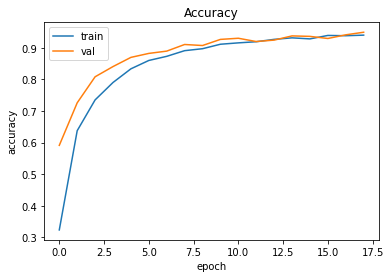

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

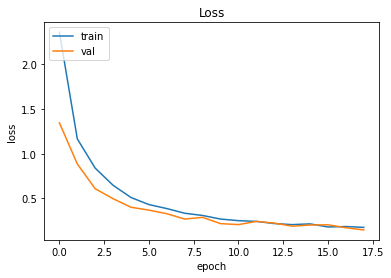

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpcoukqpiz/assets


INFO:tensorflow:Assets written to: /tmp/tmpcoukqpiz/assets


In [ ]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root    7507856 Jan 11 09:16 model.tflite
